In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
#Data Loading
rail = pd.read_csv('rail_sorted.csv')
df= rail[["Date","Total"]]
df.head()

,Date,Total
0,22/04/19,5493
1,23/04/19,9152
2,24/04/19,10665
3,25/04/19,6179
4,26/04/19,10217


In [6]:
df['Date'] = df.Date.str.replace('/','-')

<ipython-input-6-309667af63d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df.Date.str.replace('/','-')


In [7]:
#Change to Date time format
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')

<ipython-input-7-3f7a63e70a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1164 non-null   datetime64[ns]
 1   Total   1164 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.3 KB


<AxesSubplot:title={'center':'Daily Total Tickets'}, xlabel='Date'>

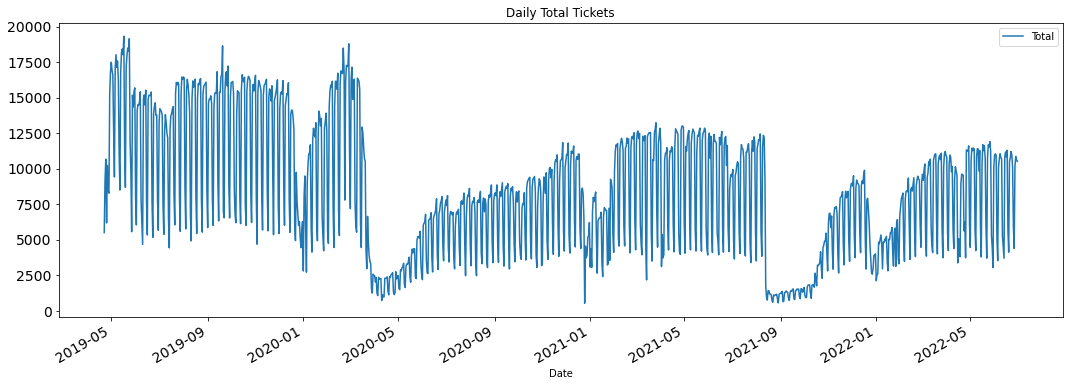

In [9]:
#TS plotting

df.plot(x='Date',y='Total',figsize=(18,6),title= 'Daily Total Tickets', fontsize=14)

In [10]:
#Setting Date time as index
data = pd.read_csv('rail_sorted.csv', parse_dates=['Date'])
data.set_index('Date', drop=True, inplace=True)
data.sort_index(inplace=True)

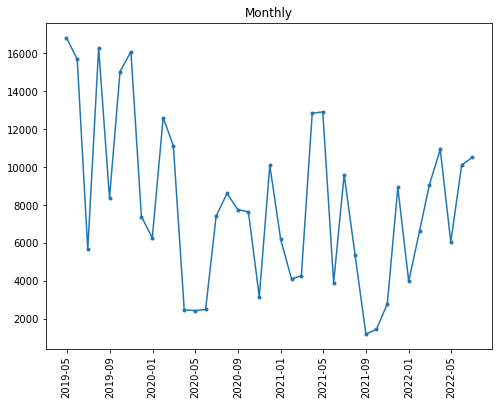

In [11]:
# Monthly cumulative plot
plt.figure(figsize=(8,6))
plt.plot(data.asfreq('M').Total, marker='.')
plt.title('Monthly')
plt.xticks(rotation=90)
plt.show()

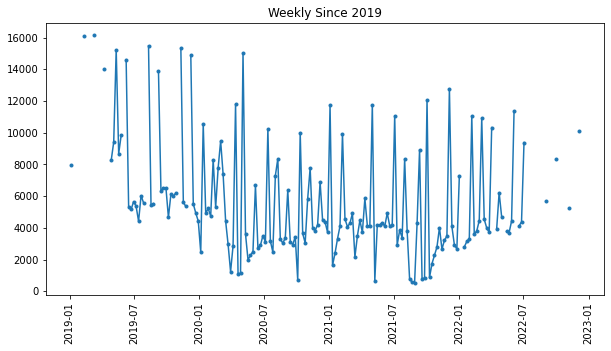

In [36]:
# Weekly cumulative plot
plt.figure(figsize=(10,5))
plt.plot(data['2019':].asfreq('W').Total, marker='.') # eth['2017':] returns a subset of eth since 2017
plt.title('Weekly Since 2019')
plt.xticks(rotation=90)
plt.show()

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

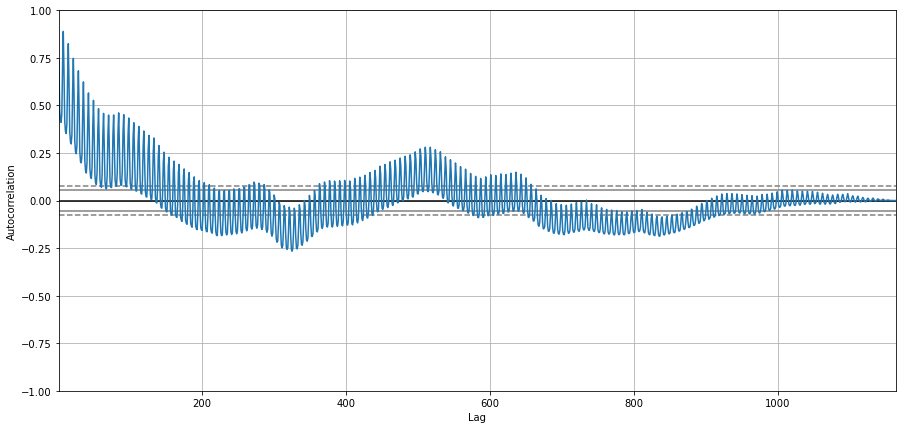

In [53]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Total'])
plt.show()

In [37]:
# Plot is like stationary series by default
#Checking for Stationarity by ADF Test

from statsmodels.tsa.stattools import adfuller
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [38]:
#ADF test
perform_adf_test(df['Total'])

ADF Statistic: -3.211770
p-value: 0.019313


In [ ]:
#The p-Value is less than the Critical value (0.05) , reject the null-hypothesis 
#Hence the series is stationary by Test

In [ ]:
#Hence can explore AR and MA Models

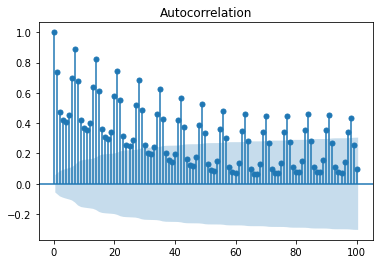

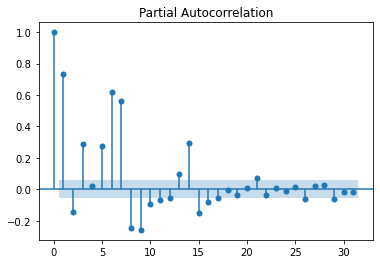

In [42]:
#ACF and PACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(df.Total, lags=100)
pacf_plot = plot_pacf(df.Total)



In [58]:
from matplotlib import pyplot

In [65]:
from statsmodels.tsa.arima_model import ARIMA

# (4,0,4) ARIMA Model as Auto.arima recommended that model(ARMA - Model1)

model = ARIMA(df.Total, order=(4,0,4))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                 1164
Model:                     ARMA(4, 4)   Log Likelihood              -10735.064
Method:                       css-mle   S.D. of innovations           2444.734
Date:                Mon, 26 Sep 2022   AIC                          21490.129
Time:                        02:45:32   BIC                          21540.725
Sample:                             0   HQIC                         21509.217
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8438.7396   1300.150      6.491      0.000    5890.492     1.1e+04
ar.L1.Total     0.8978      0.045     20.082      0.000       0.810       0.985
ar.L2.Total    -0.7417      0.024    -30.503    

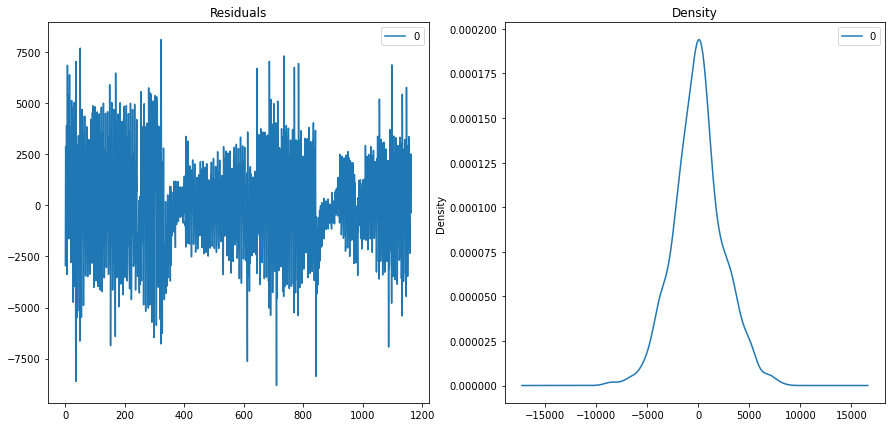

In [66]:
# Plot residual errors for ARMA
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
#The residual plots show there are informations missed by the model with patterns in it 

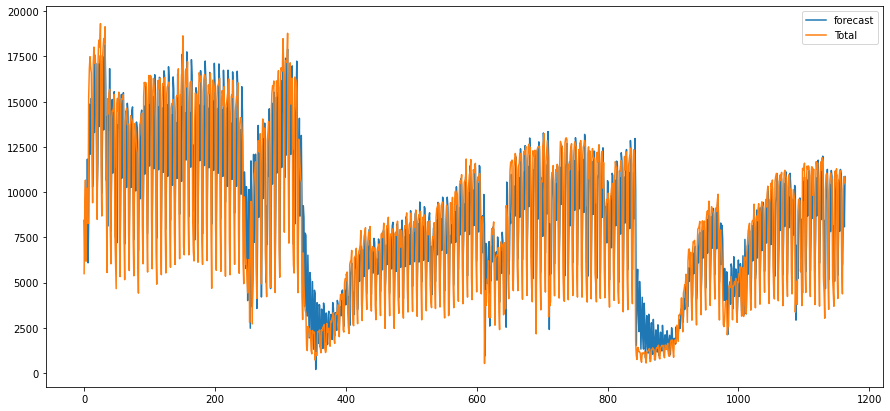

In [67]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [69]:
# MODEL 2 (10,0,10) 

model2 = ARIMA(df.Total, order=(4,0,4))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                 1164
Model:                     ARMA(4, 4)   Log Likelihood              -10735.064
Method:                       css-mle   S.D. of innovations           2444.734
Date:                Mon, 26 Sep 2022   AIC                          21490.129
Time:                        02:48:57   BIC                          21540.725
Sample:                             0   HQIC                         21509.217
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8438.7396   1300.150      6.491      0.000    5890.492     1.1e+04
ar.L1.Total     0.8978      0.045     20.082      0.000       0.810       0.985
ar.L2.Total    -0.7417      0.024    -30.503    

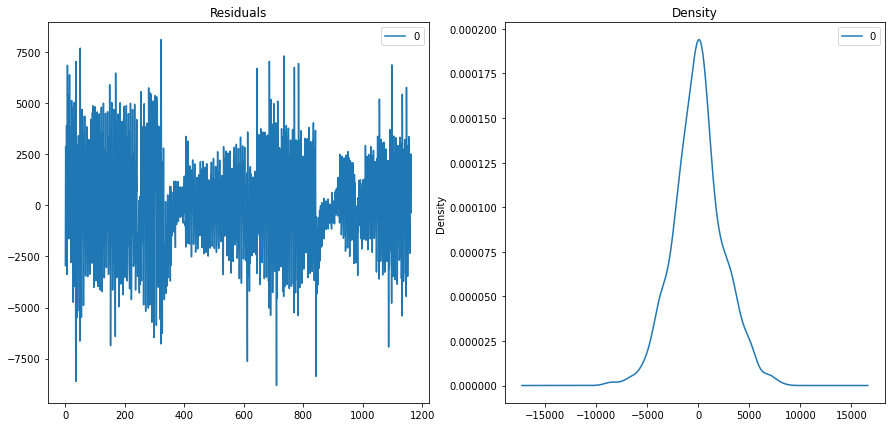

In [70]:
# Plot residual errors for ARMA
residuals = pd.DataFrame(model_fit2.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
#The plot doesnt seems white noise

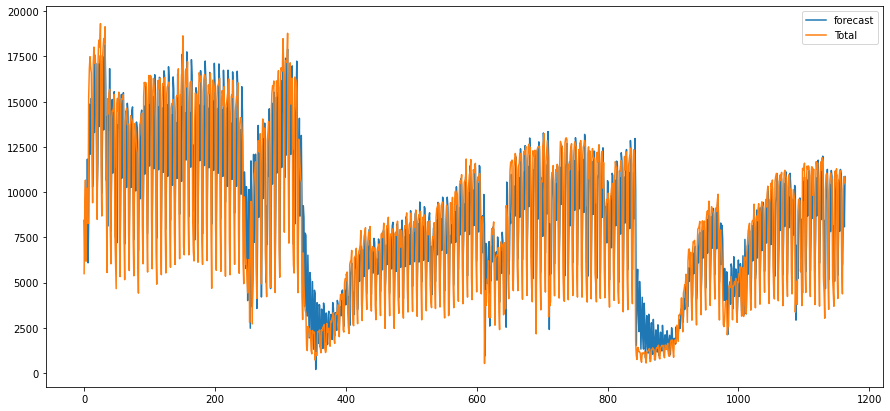

In [72]:
# Actual vs Fitted
model_fit2.plot_predict(dynamic=False)
plt.show()

In [73]:
#MODEL 3 (4,1,4)(Auto Arima Suggested) 
model3 = ARIMA(df.Total, order=(4,1,4))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                 1163
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -10367.349
Method:                       css-mle   S.D. of innovations           1794.690
Date:                Mon, 26 Sep 2022   AIC                          20754.698
Time:                        02:52:09   BIC                          20805.286
Sample:                             1   HQIC                         20773.784
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1381     25.604      0.123      0.902     -47.045      53.321
ar.L1.D.Total     0.8131      0.014     57.721      0.000       0.785       0.841
ar.L2.D.Total    -1.3868      0.018    -

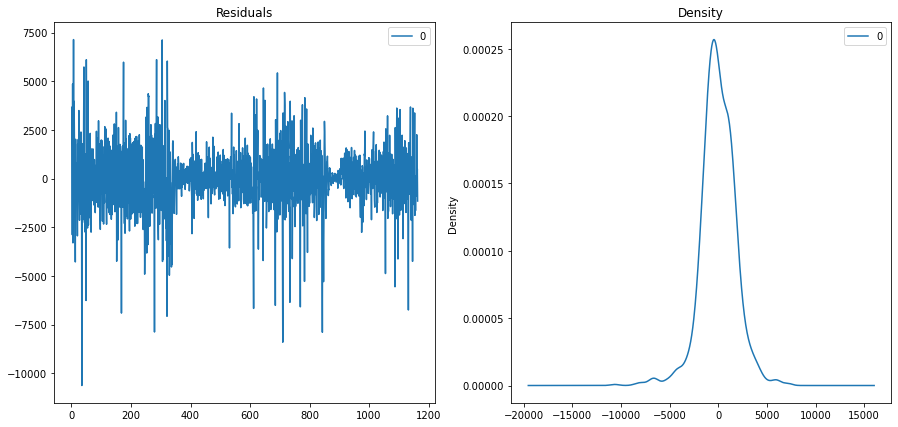

In [74]:
# Plot residual errors for ARMA
residuals = pd.DataFrame(model_fit3.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

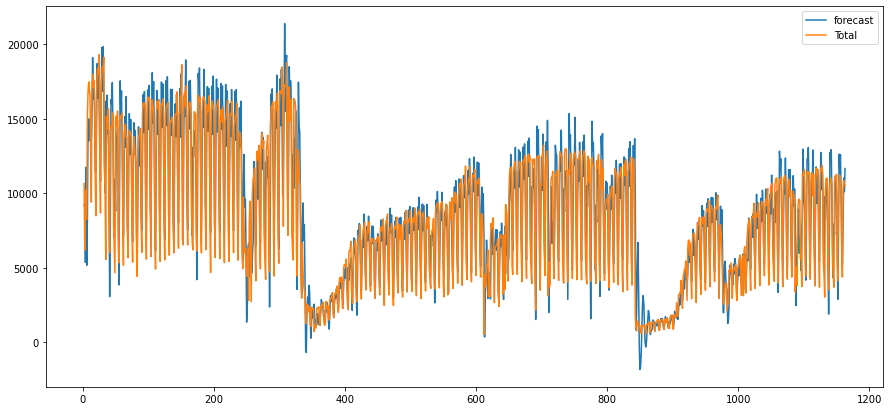

In [75]:
# Actual vs Fitted
model_fit3.plot_predict(dynamic=False)
plt.show()

In [ ]:
#Models are nor performing as expected. And can clearly see two dips for Covid effect (wave1 and wave2)
#Hence to consider the volatile nature of data and also the modle the covid effect FBProphet is tried 

In [ ]:
#GARCH model is tried as there is more volatility in the model

In [ ]:
####GARCH Model

In [2]:
pip install arch

     |████████████████████████████████| 876 kB 591 kB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 4.0 MB/s eta 0:00:01    |████████████████▊               | 9.2 MB 1.1 MB/s eta 0:00:08
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
mizani 0.7.4 requires matplotlib>=3.5.0, but you have matplotlib 3.3.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from arch import arch_model


In [4]:
rail = pd.read_csv('rail_sorted.csv')
df= rail[["Date","Total"]]
df['Date'] = df.Date.str.replace('/','-')
#df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y') 
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1164 non-null   datetime64[ns]
 1   Total   1164 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.3 KB


<ipython-input-4-390563bedbe3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df.Date.str.replace('/','-')
<ipython-input-4-390563bedbe3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')


In [5]:
train=df[0:800] 
test=df[800:]

In [16]:
train.index = train.Date 
test.index = test.Date 

In [19]:
train.drop('Date',axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
train.head()

,Total
Date,
2019-04-22,5493
2019-04-23,9152
2019-04-24,10665
2019-04-25,6179
2019-04-26,10217


In [22]:
test.drop('Date',axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
train = train.astype('double')
model = arch_model(train,mean='Zero', p=15, q=15)


In [34]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     33,   Neg. LLF: 8402.093946181854
Iteration:      2,   Func. Count:     65,   Neg. LLF: 8398.757215843903
Iteration:      3,   Func. Count:     98,   Neg. LLF: 8611.989499461608
Iteration:      4,   Func. Count:    132,   Neg. LLF: 8535.456861245231
Iteration:      5,   Func. Count:    166,   Neg. LLF: 8374.10883217034
Iteration:      6,   Func. Count:    200,   Neg. LLF: 8384.516141289072
Iteration:      7,   Func. Count:    234,   Neg. LLF: 8371.210719518498
Iteration:      8,   Func. Count:    267,   Neg. LLF: 8369.768689754825
Iteration:      9,   Func. Count:    299,   Neg. LLF: 8369.768262753885
Iteration:     10,   Func. Count:    331,   Neg. LLF: 8369.768261258423
Iteration:     11,   Func. Count:    362,   Neg. LLF: 8369.768262603806
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8369.768261258423
            Iterations: 11
            Function evaluations: 362
            Gradient evaluations: 11

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -8369.77
Distribution:                  Normal   AIC:                           16801.5
Method:            Maximum Likelihood   BIC:                           16946.8
                                        No. Observations:                  800
Date:                Mon, Sep 26 2022   Df Residuals:                      800
Time:                        22:38:32   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.1829e+06  2.105e+06      1.037      0.300 [-1.944e+06,6.309e+06]
alpha[1]       0.1090      0.164      0.664      0.507      [ -0.213,  0.431]
alpha[2]       0.0000      0.118      0.000      1.000      [ -0.232,  0.232]
alpha[3]   3.2512e-11      0.143  2.270e-10      1.000      [ -0.281,  0.281]
alpha[4]   1.6630e-11      0.101  1.644e-10      1.000      [ -0.198,  0.198]
alpha[5]   1.7529e-11      0.142  1.238e-10      1.000      [ -0.277,  0.277]
alpha[6]       0.0170      0.200  8.464e-02      0.933      [ -0.376,  0.410]
alpha[7]       0.5443      0.140      3.875  1.066e-04      [  0.269,  0.820]
alpha[8]       0.0000      1.112      0.000      1.000      [ -2.179,  2.179]
alpha[9]       0.0000      0.398      0.000      1.000      [ -0.781,  0.781]
alpha[10]  7.2655e-13      0.616  1.180e-12      1.000      [ -1.207,  1.207]
alpha[11]      0.0000      0.268      0.000      1.000      [ -0.526,  0.526]
alpha[12]      0.0000      0.302      0.000      1.000      [ -0.592,  0.592]
alpha[13]  3.1401e-11      0.181  1.731e-10      1.000      [ -0.356,  0.356]
alpha[14]      0.2958      0.511      0.578      0.563      [ -0.706,  1.298]
alpha[15]      0.0000      1.036      0.000      1.000      [ -2.031,  2.031]
beta[1]        0.0000      1.118      0.000      1.000      [ -2.191,  2.191]
beta[2]        0.0000      0.735      0.000      1.000      [ -1.441,  1.441]
beta[3]        0.0000      1.104      0.000      1.000      [ -2.163,  2.163]
beta[4]        0.0000      0.201      0.000      1.000      [ -0.394,  0.394]
beta[5]        0.0000      0.404      0.000      1.000      [ -0.793,  0.793]
beta[6]    2.7426e-11      0.572  4.791e-11      1.000      [ -1.122,  1.122]
beta[7]    5.6953e-11      1.006  5.664e-11      1.000      [ -1.971,  1.971]
beta[8]        0.0000      1.521      0.000      1.000      [ -2.980,  2.980]
beta[9]        0.0000      0.340      0.000      1.000      [ -0.667,  0.667]
beta[10]       0.0000      0.613      0.000      1.000      [ -1.201,  1.201]
beta[11]       0.0000      0.264      0.000      1.000      [ -0.517,  0.517]
beta[12]       0.0000      0.332      0.000      1.000      [ -0.652,  0.652]
beta[13]   1.0514e-11      0.259  4.053e-11      1.000      [ -0.508,  0.508]
beta[14]   4.5224e-11      0.395  1.145e-10      1.000      [ -0.774,  0.774]
beta[15]       0.0000      0.324      0.000      1.000      [ -0.635,  0.635]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
#Can clearly see the omega , alpha and beta components are not statistically significant . Hence GARCH is avoided